# 正则表达式re库基本使用
- https://cuiqingcai.com/5530.html
- https://www.runoob.com/python/python-reg-expressions.html
- https://www.runoob.com/regexp/regexp-syntax.html

正则表达式是处理字符串的强大工具，它有自己特定的语法结构，有了它，实现字符串的检索、替换、匹配验证都不在话下。

| 模式        | 描述                                                         |
| :---------- | :----------------------------------------------------------- |
| ^           | 匹配字符串的开头                                             |
| $           | 匹配字符串的末尾。                                           |
| .           | 匹配任意字符，除了换行符，当re.DOTALL标记被指定时，则可以匹配包括换行符的任意字符。 |
| [...]       | 用来表示一组字符,单独列出：[amk] 匹配 'a'，'m'或'k'          |
| [^...]      | 不在[]中的字符：\[^abc]匹配除了a,b,c之外的字符。             |
| *         | 匹配0个或多个的表达式。                                      |
| +         | 匹配1个或多个的表达式。                                      |
| ?         | 匹配0个或1个由前面的正则表达式定义的片段，非贪婪方式         |
| { n}      | 精确匹配 n 个前面表达式。例如， **o{2}** 不能匹配 "Bob" 中的 "o"，但是能匹配 "food" 中的两个 o。 |
| { n,}     | 匹配 n 个前面表达式。例如， o{2,} 不能匹配"Bob"中的"o"，但能匹配 "foooood"中的所有 o。"o{1,}" 等价于 "o+"。"o{0,}" 则等价于 "o*"。 |
| { n, m}   | 匹配 n 到 m 次由前面的正则表达式定义的片段，贪婪方式         |
| a\| b       | 匹配a或b                                                     |
| (re)        | 对正则表达式分组并记住匹配的文本                             |
| \w          | 匹配字母数字及下划线                                         |
| \W          | 匹配非字母数字及下划线                                       |
| \s          | 匹配任意空白字符，等价于 **[ \t\n\r\f]**。                   |
| \S          | 匹配任意非空字符                                             |
| \d          | 匹配任意数字，等价于 [0-9].                                  |
| \D          | 匹配任意非数字                                               |
| \A          | 匹配字符串开始                                               |
| \Z          | 匹配字符串结束，如果是存在换行，只匹配到换行前的结束字符串。 |
| \z          | 匹配字符串结束                                               |
| \G          | 匹配最后匹配完成的位置。                                     |
| \b          | 匹配一个单词边界，也就是指单词和空格间的位置。例如， 'er\b' 可以匹配"never" 中的 'er'，但不能匹配 "verb" 中的 'er'。 |
| \B          | 匹配非单词边界。'er\B' 能匹配 "verb" 中的 'er'，但不能匹配 "never" 中的 'er'。 |
| \n, \t, 等. | 匹配一个换行符。匹配一个制表符。等                           |


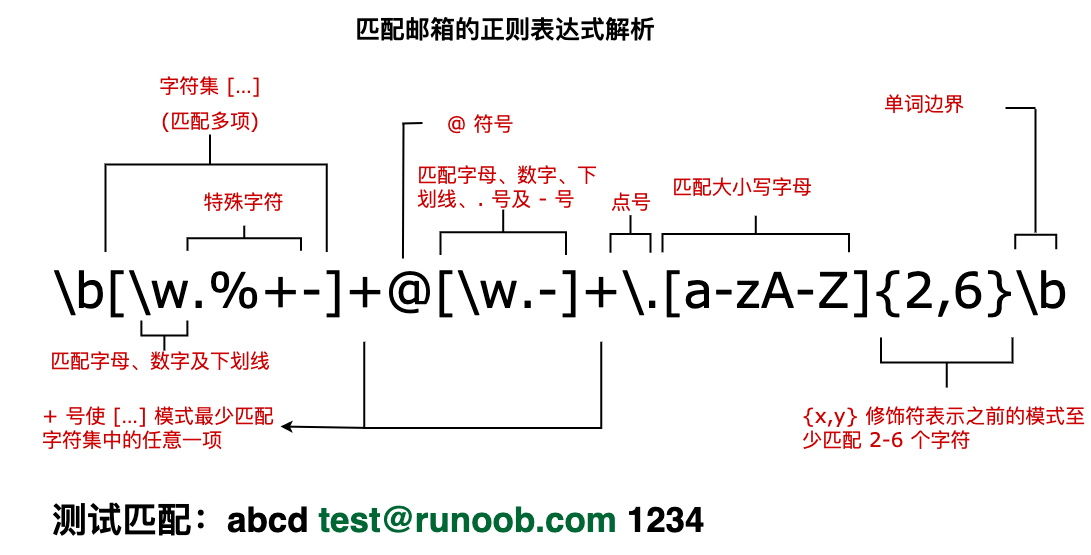

In [2]:
import re

## 1、match()
match()，向它传入要匹配的字符串以及正则表达式，就可以检测这个正则表达式是否匹配字符串。

match() 方法会尝试从字符串的起始位置匹配正则表达式，如果匹配，就返回匹配成功的结果；如果不匹配，就返回 None。

In [3]:
content = 'Hello 123 4567 World_This is a Regex Demo'
print(len(content))
result = re.match('^Hello\s\d\d\d\s\d{4}\s\w{10}', content)
print(result)
print(result.group())
print(result.span())

41
<re.Match object; span=(0, 25), match='Hello 123 4567 World_This'>
Hello 123 4567 World_This
(0, 25)


### 匹配目标
刚才我们用 match() 方法可以得到匹配到的字符串内容，但是如果想从字符串中提取一部分内容，该怎么办呢？就像最前面的实例一样，从一段文本中提取出邮件或电话号码等内容。

这里可以使用 () 括号将想提取的子字符串括起来。() 实际上标记了一个子表达式的开始和结束位置，被标记的每个子表达式会依次对应每一个分组，调用 group() 方法传入分组的索引即可获取提取的结果。

In [4]:
content = 'Hello 1234567 World_This is a Regex Demo'
result = re.match('^Hello\s(\d+)\sWorld', content)
print(result)
print(result.group())
print(result.group(1))
print(result.span())

<re.Match object; span=(0, 19), match='Hello 1234567 World'>
Hello 1234567 World
1234567
(0, 19)


### 贪婪与非贪婪

In [10]:
content = 'Hello 1234567 World_This is a Regex Demo'
# .* 贪婪方式
result = re.match('^He.*(\d+).*Demo$', content)
print(result)
print(result.group(1))

<re.Match object; span=(0, 40), match='Hello 1234567 World_This is a Regex Demo'>
7


In [12]:
content = 'Hello 1234567 World_This is a Regex Demo'
# .*? 非贪婪方式
result = re.match('^He.*?(\d+).*Demo$', content)
print(result)
print(result.group(1))

<re.Match object; span=(0, 40), match='Hello 1234567 World_This is a Regex Demo'>
1234567


In [15]:
# 但这里需要注意，如果匹配的结果在字符串结尾，.*? 就有可能匹配不到任何内容了，因为它会匹配尽可能少的字符。
content = 'http://weibo.com/comment/kEraCN'
result1 = re.match('http.*?comment/(.*?)', content)
result2 = re.match('http.*?comment/(.*)', content)
print('result1：', result1.group(1))
print('result2：', result2.group(1))

result1： 
result2： kEraCN


### 修饰符
正则表达式可以包含一些可选标志修饰符来控制匹配的模式。修饰符被指定为一个可选的标志。我们用实例来看一下：

In [16]:
content = '''Hello 1234567 World_This
is a Regex Demo
'''
result = re.match('^He.*?(\d+).*?Demo$', content)
print(result.group(1))

AttributeError: 'NoneType' object has no attribute 'group'

运行直接报错，也就是说正则表达式没有匹配到这个字符串，返回结果为 None，而我们又调用了 group() 方法导致 AttributeError。

那么，为什么加了一个换行符，就匹配不到了呢？这是因为 \\. 匹配的是除换行符之外的任意字符，当遇到换行符时，.*? 就不能匹配了，所以导致匹配失败。这里只需加一个修饰符 re.S，即可修正这个错误：

In [18]:
result = re.match('^He.*?(\d+).*?Demo$', content, re.S)
print(result.group(1))

1234567


这个 re.S 在网页匹配中经常用到。因为 HTML 节点经常会有换行，加上它，就可以匹配节点与节点之间的换行了。

另外，还有一些修饰符，在必要的情况下也可以使用:
- re.I：使匹配对大小写不敏感
- re.L：做本地化识别（locale-aware）匹配
- re.M：多行匹配，影响 ^ 和 $
- re.S：使. 匹配包括换行在内的所有字符
- re.U：根据 Unicode 字符集解析字符。这个标志影响 \\w、\\W、 \\b 和 \\B
- re.X：该标志通过给予你更灵活的格式以便你将正则表达式写得更易于理解

在网页匹配中，较为常用的有 re.S 和 re.I。

## 2、search()
前面提到过，match() 方法是从字符串的开头开始匹配的，一旦开头不匹配，那么整个匹配就失败了。我们看下面的例子：

In [19]:
content = 'Extra stings Hello 1234567 World_This is a Regex Demo Extra stings'
result = re.match('Hello.*?(\d+).*?Demo', content)
print(result)

None


因为 match() 方法在使用时需要考虑到开头的内容，这在做匹配时并不方便。它更适合用来检测某个字符串是否符合某个正则表达式的规则。

这里就有另外一个方法 search()，它在匹配时会扫描整个字符串，然后返回第一个成功匹配的结果。也就是说，正则表达式可以是字符串的一部分，在匹配时，search() 方法会依次扫描字符串，直到找到第一个符合规则的字符串，然后返回匹配内容，如果搜索完了还没有找到，就返回 None。

我们把上面代码中的 match() 方法修改成 search()，再看下运行结果：

In [20]:
content = 'Extra stings Hello 1234567 World_This is a Regex Demo Extra stings'
result = re.search('Hello.*?(\d+).*?Demo', content)
print(result)

<re.Match object; span=(13, 53), match='Hello 1234567 World_This is a Regex Demo'>


因此，为了匹配方便，我们可以尽量使用 search() 方法。

In [21]:
html = '''<div id="songs-list">
    <h2 class="title">经典老歌</h2>
    <p class="introduction">
        经典老歌列表
    </p>
    <ul id="list" class="list-group">
        <li data-view="2">一路上有你</li>
        <li data-view="7">
            <a href="/2.mp3" singer="任贤齐">沧海一声笑</a>
        </li>
        <li data-view="4" class="active">
            <a href="/3.mp3" singer="齐秦">往事随风</a>
        </li>
        <li data-view="6"><a href="/4.mp3" singer="beyond">光辉岁月</a></li>
        <li data-view="5"><a href="/5.mp3" singer="陈慧琳">记事本</a></li>
        <li data-view="5">
            <a href="/6.mp3" singer="邓丽君"><i class="fa fa-user"></i>但愿人长久</a>
        </li>
    </ul>
</div>'''

In [22]:
result = re.search('<li.*?active.*?singer="(.*?)">(.*?)</a>', html, re.S)
if result:
    print(result.group(1), result.group(2))

齐秦 往事随风


In [23]:
result = re.search('<li.*?singer="(.*?)">(.*?)</a>', html, re.S)
if result:
    print(result.group(1), result.group(2))

任贤齐 沧海一声笑


In [24]:
result = re.search('<li.*?singer="(.*?)">(.*?)</a>', html)
if result:
    print(result.group(1), result.group(2))

beyond 光辉岁月


## 3、findall()
 search() 方法的用法，它可以返回匹配正则表达式的第一个内容，但是如果想要获取匹配正则表达式的所有内容，那该怎么办呢？这时就要借助 findall() 方法了。该方法会搜索整个字符串，然后返回匹配正则表达式的所有内容。

In [25]:
results = re.findall('<li.*?href="(.*?)".*?singer="(.*?)">(.*?)</a>', html, re.S)
print(results)
print(type(results))
for result in results:
    print(result)
    print(result[0], result[1], result[2])

[('/2.mp3', '任贤齐', '沧海一声笑'), ('/3.mp3', '齐秦', '往事随风'), ('/4.mp3', 'beyond', '光辉岁月'), ('/5.mp3', '陈慧琳', '记事本'), ('/6.mp3', '邓丽君', '<i class="fa fa-user"></i>但愿人长久')]
<class 'list'>
('/2.mp3', '任贤齐', '沧海一声笑')
/2.mp3 任贤齐 沧海一声笑
('/3.mp3', '齐秦', '往事随风')
/3.mp3 齐秦 往事随风
('/4.mp3', 'beyond', '光辉岁月')
/4.mp3 beyond 光辉岁月
('/5.mp3', '陈慧琳', '记事本')
/5.mp3 陈慧琳 记事本
('/6.mp3', '邓丽君', '<i class="fa fa-user"></i>但愿人长久')
/6.mp3 邓丽君 <i class="fa fa-user"></i>但愿人长久


## 4、sub()
除了使用正则表达式提取信息外，有时候还需要借助它来修改文本。比如，想要把一串文本中的所有数字都去掉，如果只用字符串的 replace() 方法，那就太烦琐了，这时可以借助 sub() 方法。

In [27]:
content = '54aK54yr5oiR54ix5L2g'
content = re.sub('\d+', '', content)
print(content)

aKyroiRixLg


## 5、compile()
这个方法可以将正则字符串编译成正则表达式对象，以便在后面的匹配中复用。

In [30]:
content1 = '2016-12-15 12:00'
content2 = '2016-12-17 12:55'
content3 = '2016-12-22 13:21'
pattern = re.compile('\d{2}:\d{2}')
result1 = re.sub(pattern, '', content1)
result2 = re.sub(pattern, '', content2)
result3 = re.sub(pattern, '', content3)
print(result1, result2, result3)

2016-12-15  2016-12-17  2016-12-22 
